In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
from pathlib import Path
from tools import tree

%matplotlib inline

In [2]:
EXTERNAL_DATA = Path("../data/external")

In [3]:
tree(EXTERNAL_DATA)

+ ..\data\external
    + Data_10-3-2019---695.csv
    + ValueLabels_10-3-2019---695.csv


In [4]:
data = pd.read_csv(EXTERNAL_DATA / 'Data_10-3-2019---695.csv')
labels= pd.read_csv(EXTERNAL_DATA / 'ValueLabels_10-3-2019---695.csv')

In [5]:
data.head()

,UnitID,Institution Name,FIPS state code (HD2017),Sector of institution (HD2017),Degree-granting status (HD2017),Institution size category (HD2017),Institution (entity) name (HD2017),Institution name alias (HD2017),Street address or post office box (HD2017),City location of institution (HD2017),...,Undergraduate enrollment (DRVEF2017),Graduate enrollment (DRVEF2017),Number of students receiving a Doctor's degree (DRVC2017),Number of students receiving a Master's degree (DRVC2017),Number of students receiving a Bachelor's degree (DRVC2017),Number of students receiving an Associate's degree (DRVC2017),Number of students receiving a Postbaccalaureate or Post-master's certificate (DRVC2017),Number of students receiving a certificate of 1 but less than 4-years (DRVC2017),Number of students receiving a certificate of less than 1-year (DRVC2017),Unnamed: 24
0,177834,A T Still University of Health Sciences,29,2,1,2,A T Still University of Health Sciences,NaN,800 W Jefferson,Kirksville,...,0.0,3723.0,763,283,0,0,120,0,0,NaN
1,222178,Abilene Christian University,48,2,1,3,Abilene Christian University,NaN,NaN,Abilene,...,3666.0,1479.0,3,256,743,3,11,0,1,NaN
2,138558,Abraham Baldwin Agricultural College,13,1,1,2,Abraham Baldwin Agricultural College,ABAC,2802 Moore Hwy,Tifton,...,3394.0,0.0,0,0,206,389,0,0,0,NaN
3,488031,Abraham Lincoln University,6,3,1,1,Abraham Lincoln University,NaN,3530 Wilshire Boulevard Suite 1430,Los Angeles,...,30.0,167.0,17,6,2,0,0,0,0,NaN
4,172866,Academy College,27,3,1,1,Academy College,NaN,1600 W. 82nd Street Suite 100,Bloomington,...,65.0,0.0,0,0,6,16,0,4,27,NaN


In [6]:
labels.head()

,VariableName,Value,ValueLabel
0,State abbreviation (HD2017),AL,Alabama
1,State abbreviation (HD2017),AK,Alaska
2,State abbreviation (HD2017),AZ,Arizona
3,State abbreviation (HD2017),AR,Arkansas
4,State abbreviation (HD2017),CA,California


In [7]:
labels['VariableName'].unique()

array(['State abbreviation (HD2017)', 'FIPS state code (HD2017)',
       'Sector of institution (HD2017)',
       'Degree-granting status (HD2017)', 'Fips County code (HD2017)',
       'Institution size category (HD2017)'], dtype=object)

In [8]:
labels[labels['VariableName'] == 'Sector of institution (HD2017)']

,VariableName,Value,ValueLabel
102,Sector of institution (HD2017),1,"Public, 4-year or above"
103,Sector of institution (HD2017),2,"Private not-for-profit, 4-year or above"
104,Sector of institution (HD2017),3,"Private for-profit, 4-year or above"


In [9]:
labels[labels['VariableName'] == 'Institution size category (HD2017)']

,VariableName,Value,ValueLabel
1036,Institution size category (HD2017),1,"Under 1,000"
1037,Institution size category (HD2017),2,"1,000 - 4,999"
1038,Institution size category (HD2017),3,"5,000 - 9,999"
1039,Institution size category (HD2017),4,"10,000 - 19,999"
1040,Institution size category (HD2017),5,"20,000 and above"


In [10]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data['Longitude location of institution (HD2017)'], data['Latitude location of institution (HD2017)']))

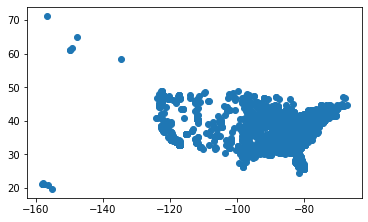

In [11]:
gdf.plot();

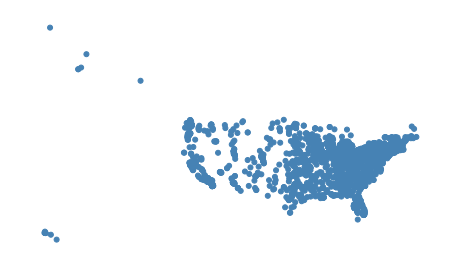

In [12]:
gplt.pointplot(gdf)

It comes with some data already

In [13]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

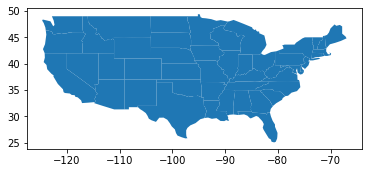

In [14]:
contiguous_usa.plot();

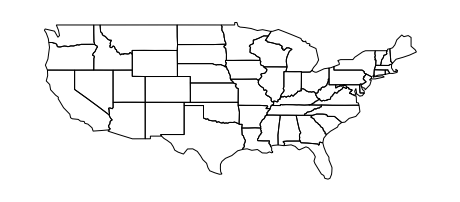

In [15]:
gplt.polyplot(contiguous_usa)

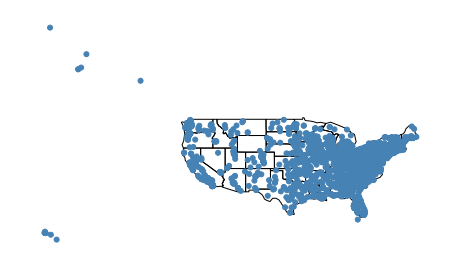

In [16]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(gdf, ax = ax)

Filter Alaska and Hawai'i

In [17]:
mask_lower48 = (gdf['State abbreviation (HD2017)'] != 'HI') & (gdf['State abbreviation (HD2017)'] != 'AK')

In [18]:
gdf[mask_lower48]['State abbreviation (HD2017)'].unique()

array(['MO', 'TX', 'GA', 'CA', 'MN', 'FL', 'CO', 'NY', 'IL', 'MI', 'AL',
       'CT', 'PA', 'MS', 'WV', 'KY', 'OH', 'IA', 'SC', 'WI', 'TN', 'OR',
       'MA', 'VA', 'DC', 'UT', 'IN', 'NH', 'WA', 'NC', 'AZ', 'NV', 'AR',
       'SD', 'OK', 'MD', 'NJ', 'KS', 'ME', 'NE', 'VT', 'ND', 'ID', 'NM',
       'RI', 'MT', 'LA', 'DE', 'WY'], dtype=object)

In [19]:
lower_48 = gdf[mask_lower48].copy()

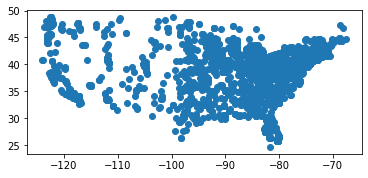

In [20]:
lower_48.plot();

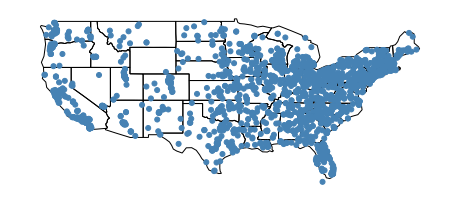

In [21]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(lower_48, ax = ax)

BUT THAT'S WEIRD

# enter projections

In [22]:
import geoplot.crs as gcrs

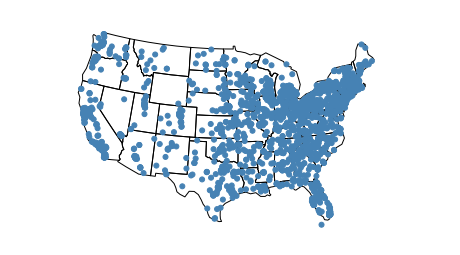

In [23]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(lower_48, ax = ax)

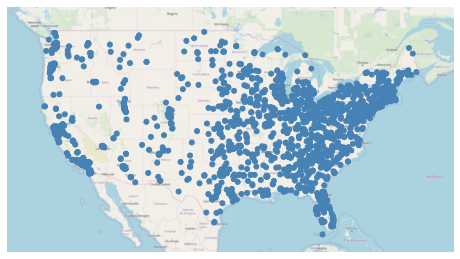

In [24]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(lower_48, ax=ax)

Encoding other parameters

In [25]:
lower_48.columns

Index(['UnitID', 'Institution Name', 'FIPS state code (HD2017)',
       'Sector of institution (HD2017)', 'Degree-granting status (HD2017)',
       'Institution size category (HD2017)',
       'Institution (entity) name (HD2017)', 'Institution name alias (HD2017)',
       'Street address or post office box (HD2017)',
       'City location of institution (HD2017)', 'State abbreviation (HD2017)',
       'Fips County code (HD2017)', 'County name (HD2017)',
       'Longitude location of institution (HD2017)',
       'Latitude location of institution (HD2017)',
       'Undergraduate enrollment (DRVEF2017)',
       'Graduate enrollment (DRVEF2017)',
       'Number of students receiving a Doctor's degree (DRVC2017)',
       'Number of students receiving a Master's degree (DRVC2017)',
       'Number of students receiving a Bachelor's degree (DRVC2017)',
       'Number of students receiving an Associate's degree (DRVC2017)',
       'Number of students receiving a Postbaccalaureate or Post-maste

In [26]:
lower_48['Undergraduate enrollment (DRVEF2017)'] = lower_48['Undergraduate enrollment (DRVEF2017)'].fillna(0)

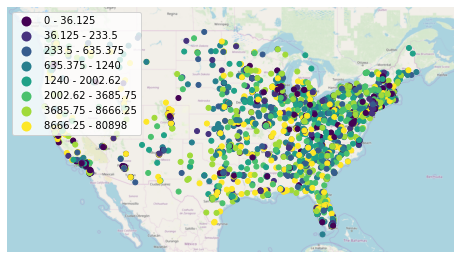

In [27]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(lower_48, ax=ax, hue='Undergraduate enrollment (DRVEF2017)', k=8, legend=True,)

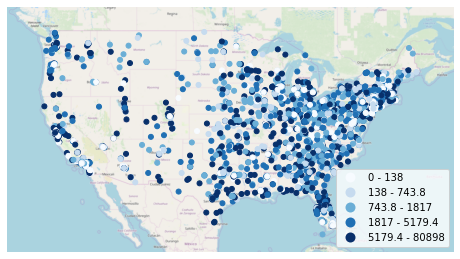

In [28]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(lower_48, ax=ax, hue='Undergraduate enrollment (DRVEF2017)', k=5, cmap='Blues', legend=True)

Adding `scale`

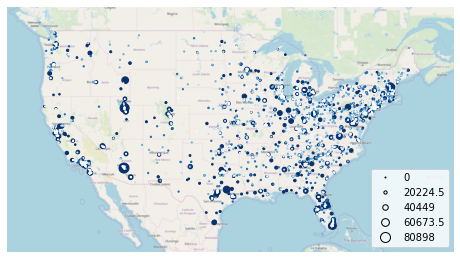

In [29]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(
    lower_48, ax=ax, hue='Undergraduate enrollment (DRVEF2017)', k=5, cmap='Blues',
    scale='Undergraduate enrollment (DRVEF2017)', limits=(1, 10),
    legend=True, legend_var='scale'
)

Because it's matplotlib underneath you can adjust the look and feel of the plot a lot.

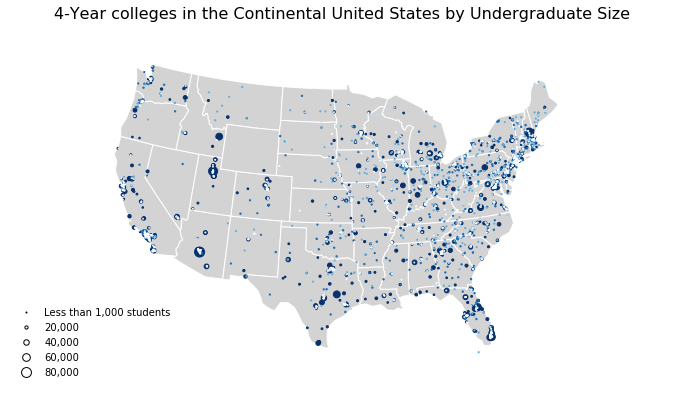

In [30]:
ax = gplt.polyplot(
    contiguous_usa, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', facecolor='lightgray',
    figsize=(12, 8)
)
gplt.pointplot(
    lower_48, ax=ax, hue='Undergraduate enrollment (DRVEF2017)', cmap='Blues', k=5,
    scale='Undergraduate enrollment (DRVEF2017)', limits=(1, 10),
    legend=True, legend_var='scale',
    legend_kwargs={'frameon': False},
    legend_values=[0, 20000, 40000, 60000, 80000],
    legend_labels=['Less than 1,000 students', '20,000', '40,000', '60,000', '80,000']
)
ax.set_title('4-Year colleges in the Continental United States by Undergraduate Size', fontsize=16);

# KDE

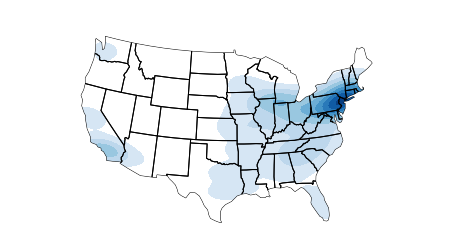

In [31]:
ax = gplt.kdeplot(lower_48,  cmap='Blues', shade=True, clip=contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.polyplot(contiguous_usa, zorder=1, ax=ax)

And many more

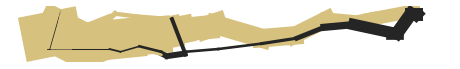

In [32]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import mplleaflet
from matplotlib.colors import LinearSegmentedColormap

napoleon_troop_movements = gpd.read_file(gplt.datasets.get_path('napoleon_troop_movements'))

colors = [(215/255, 193/255, 126/255), (37/255, 37/255, 37/255)]
cm = LinearSegmentedColormap.from_list('minard', colors)

gplt.sankey(
    napoleon_troop_movements,
    scale='survivors', limits=(0.5, 45),
    hue='direction',
    cmap=cm
)
fig = plt.gcf()
plt.savefig("minard-napoelon-russia.png", bbox_inches='tight', pad_inches=0.1)

In [33]:
mplleaflet.display(fig)

C:\Users\sanchez\AppData\Local\Continuum\anaconda3\envs\NACIS2019\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
